# Importing Necessary modules

In [2]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.preprocessing import LabelEncoder

#preprocess.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint,EarlyStopping

# specifically for cnn
from tensorflow.keras.layers import Dropout, Flatten,Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, MaxPool2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image


# Data Preparation

In [3]:
X = []
Z = []
IMG_SIZE = 224
FLOWER_DAISY_DIR = 'flowers/daisy'
FLOWER_SUNFLOWER_DIR = 'flowers/sunflower'
FLOWER_TULIP_DIR = 'flowers/tulip'
FLOWER_DANDI_DIR = 'flowers/dandelion'
FLOWER_ROSE_DIR = 'flowers/rose'

In [4]:
def assign_label(img, flower_type):
    return flower_type

In [5]:
#Getting Train Data
def make_train_data(flower_type, DIR):
    for img in tqdm(os.listdir(DIR)):
        label = assign_label(img, flower_type)
        path = os.path.join(DIR, img)
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

        X.append(np.array(img))
        Z.append(str(label))

In [6]:
make_train_data('Daisy', FLOWER_DAISY_DIR)
print(len(X))

100%|██████████| 764/764 [00:04<00:00, 153.07it/s]

764


In [7]:
make_train_data('Sunflower', FLOWER_SUNFLOWER_DIR)
print(len(X))

100%|██████████| 733/733 [00:02<00:00, 319.60it/s]

1497


In [8]:
make_train_data('Tulip', FLOWER_TULIP_DIR)
print(len(X))

100%|██████████| 984/984 [00:02<00:00, 359.72it/s]

2481


In [9]:
make_train_data('Dandelion', FLOWER_DANDI_DIR)
print(len(X))

100%|██████████| 1052/1052 [00:03<00:00, 326.67it/s]

3533


In [10]:
make_train_data('Rose', FLOWER_ROSE_DIR)
print(len(X))

100%|██████████| 784/784 [00:02<00:00, 358.07it/s]

4317


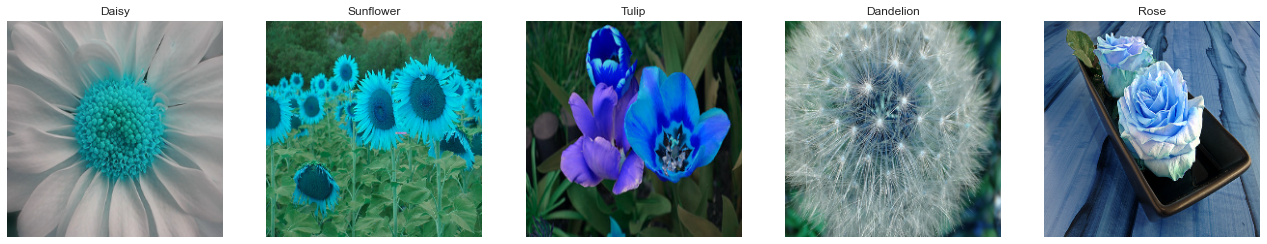

In [11]:
#plotting one of all flower types in data
plt.figure(figsize = (20,20))
for i in range(5):
    img = X[950*i]
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(Z[950*i])

In [12]:
le = LabelEncoder()
Y = le.fit_transform(Z)
Y = to_categorical(Y, 5)
X = np.array(X)
X = X/255

In [13]:
# Splitting training and testing data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

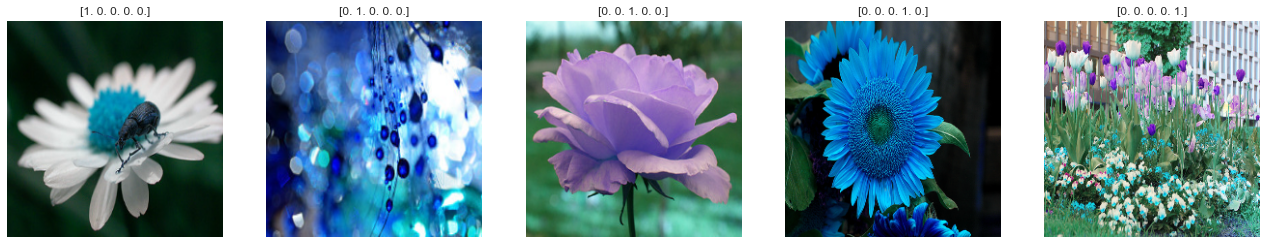

In [14]:
#Plotting random 5 images in train data
plt.figure(figsize = (20,20))
for i in range(5):
    img = x_train[600*i]
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(y_train[600*i])
plt.show()

In [15]:
print("X_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("======")
print("X_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (3453, 224, 224, 3)
y_train shape: (3453, 5)
X_test shape: (864, 224, 224, 3)
y_test shape: (864, 5)


# Model Building

In [16]:
# # modelling starts using a CNN.
model = Sequential()
# 1st Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3),padding="Same",activation="relu" , input_shape = (IMG_SIZE,IMG_SIZE,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
# 2nd Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
# 3rd Convolutional Layer
model.add(Conv2D(filters=96, kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
# 4th Convolutional Layer
model.add(Conv2D(filters=64,kernel_size = (3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
# 5th Convolutional Layer
model.add(Conv2D(filters=32,kernel_size = (3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(128,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
# 2st Fully Connected Layer
model.add(Dense(64,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
# Add output layer
model.add(Dense(5,activation="softmax"))

model.summary() # print summary my model
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001),metrics=['accuracy']) #compile model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 256)     7168      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 256)     0         
_________________________________________________________________
batch_normalization (BatchNo (None, 112, 112, 256)     1024      
_________________________________________________________________
dropout (Dropout)            (None, 112, 112, 256)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 128)     295040    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 56, 56, 128)       5

In [17]:
batch_size = 32
epochs = 100

red_lr = ReduceLROnPlateau(monitor='val_accuracy',patience=3,verbose=1,factor=0.1)

In [18]:
#Create a data augmentation and apply it to x_train data to prevent over-fitting

datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    rotation_range=60,  # randomly rotate images in the range (60, 0 to 180)
    zoom_range = 0.1, # Randomly zoom image 
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,
    shear_range=0.1,
    fill_mode = "reflect"
    ) 
datagen.fit(x_train)

# Training And Testing The Model

In [18]:
filepath = "ImageModel.hdf5"

checkpoint = ModelCheckpoint(filepath, save_weights_only=False,
                             monitor='val_loss', mode='min', save_best_only=True, verbose=1)

earlyStop =  EarlyStopping(monitor='val_loss', mode='min', patience=30)
callbacks_list = [earlyStop, checkpoint]

History = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                              epochs=epochs, validation_data=(x_test, y_test),
                              verbose=1,
                              callbacks=callbacks_list)

Epoch 1/100
108/108 [==============================] - 66s 304ms/step - loss: 2.0294 - accuracy: 0.3148 - val_loss: 2.9310 - val_accuracy: 0.2257

Epoch 00001: val_loss improved from inf to 2.93101, saving model to ImageModel.hdf5
Epoch 2/100
108/108 [==============================] - 28s 262ms/step - loss: 1.5272 - accuracy: 0.4208 - val_loss: 2.1345 - val_accuracy: 0.2269

Epoch 00002: val_loss improved from 2.93101 to 2.13454, saving model to ImageModel.hdf5
Epoch 3/100
108/108 [==============================] - 29s 263ms/step - loss: 1.3750 - accuracy: 0.4518 - val_loss: 1.5962 - val_accuracy: 0.3403

Epoch 00003: val_loss improved from 2.13454 to 1.59615, saving model to ImageModel.hdf5
Epoch 4/100
108/108 [==============================] - 28s 262ms/step - loss: 1.2361 - accuracy: 0.4964 - val_loss: 1.5883 - val_accuracy: 0.3449

Epoch 00004: val_loss improved from 1.59615 to 1.58833, saving model to ImageModel.hdf5
Epoch 5/100
108/108 [==============================] - 29s 266ms

108/108 [==============================] - 28s 254ms/step - loss: 0.4549 - accuracy: 0.8462 - val_loss: 0.4634 - val_accuracy: 0.8264

Epoch 00079: val_loss improved from 0.48563 to 0.46343, saving model to ImageModel.hdf5
Epoch 80/100
108/108 [==============================] - 28s 254ms/step - loss: 0.4006 - accuracy: 0.8564 - val_loss: 0.5530 - val_accuracy: 0.7975

Epoch 00080: val_loss did not improve from 0.46343
Epoch 81/100
108/108 [==============================] - 28s 255ms/step - loss: 0.4168 - accuracy: 0.8532 - val_loss: 0.9621 - val_accuracy: 0.7014

Epoch 00081: val_loss did not improve from 0.46343
Epoch 82/100
108/108 [==============================] - 28s 254ms/step - loss: 0.4094 - accuracy: 0.8575 - val_loss: 0.5142 - val_accuracy: 0.8160

Epoch 00082: val_loss did not improve from 0.46343
Epoch 83/100
108/108 [==============================] - 28s 254ms/step - loss: 0.3990 - accuracy: 0.8569 - val_loss: 0.5353 - val_accuracy: 0.8125

Epoch 00083: val_loss did not im

In [19]:
print("Test Accuracy: {0:.2f}%".format(model.evaluate(x_test,y_test)[1]*100)) #get score acording to test datas

27/27 [==============================] - 1s 44ms/step - loss: 0.8137 - accuracy: 0.7361
Test Accuracy: 73.61%


# Evaluating The Model

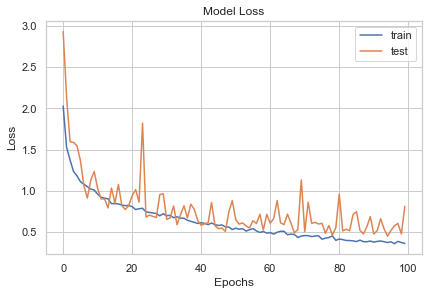

In [20]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

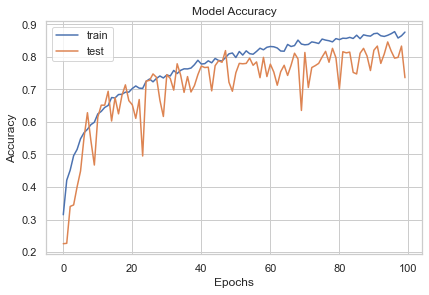

In [21]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [22]:
model.load_weights("ImageModel.hdf5")

loss, accuracy = model.evaluate(x_train, y_train, verbose=False)
print("Training Accuracy:  {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(x_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy:  0.9259
Testing Accuracy:  0.8461


Classification Report
              precision    recall  f1-score   support

       Daisy       0.90      0.77      0.83       162
   Sunflower       0.87      0.92      0.90       195
       Tulip       0.70      0.87      0.78       156
   Dandelion       0.89      0.92      0.91       155
        Rose       0.89      0.76      0.82       196

    accuracy                           0.85       864
   macro avg       0.85      0.85      0.85       864
weighted avg       0.85      0.85      0.85       864



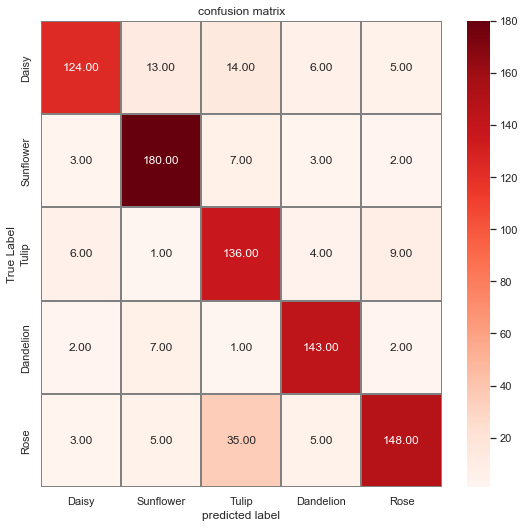

In [30]:
from sklearn.metrics import confusion_matrix,classification_report
# demonstration of calculating metrics for a neural network model using sklearn
# Predict the values from the validation dataset

Y_pred = model.predict(x_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(y_test,axis = 1)

confusion_mtx = confusion_matrix(Y_true,Y_pred_classes)
print('Classification Report')
target_names = ['Daisy', 'Sunflower','Tulip', 'Dandelion','Rose']
print(classification_report(Y_true, Y_pred_classes,target_names=target_names))
plt.figure(figsize = (8,8))
sns.heatmap(confusion_mtx,cmap= "Reds", linecolor = 'gray' , linewidth = 0.01 , annot = True, fmt='.2f' , xticklabels = target_names , yticklabels = target_names)
plt.xlabel("predicted label")
plt.ylabel("True Label")
plt.title("confusion matrix")
plt.show()

# Visualizing Predictions

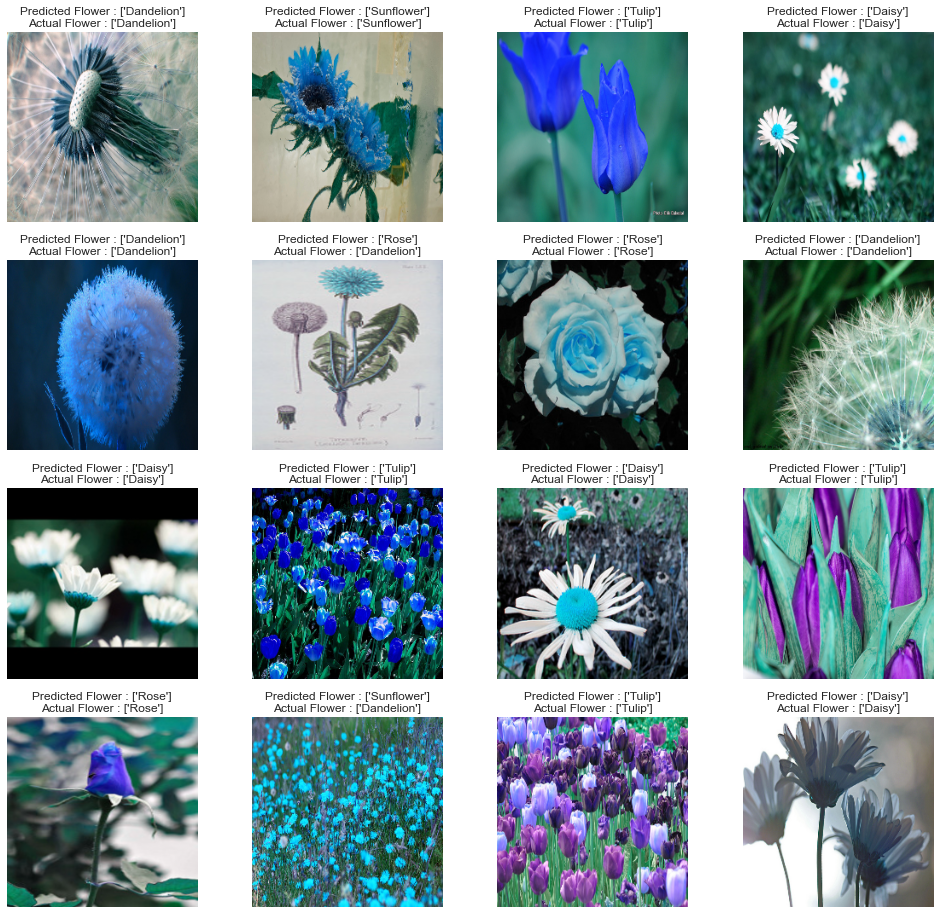

In [62]:
# figure out samples of this data with the true value and predicted ones
plt.figure(figsize=(15,15))
st = 10
for i in range(st,st+16):
    plt.subplot(4,4,i+1-st)
    plt.imshow(x_test[i])
    plt.title("Predicted Flower : "+str(le.inverse_transform([Y_pred_classes[i]]))+"\n"+"Actual Flower : "+str(le.inverse_transform([Y_true[i]])))
    plt.axis('off')

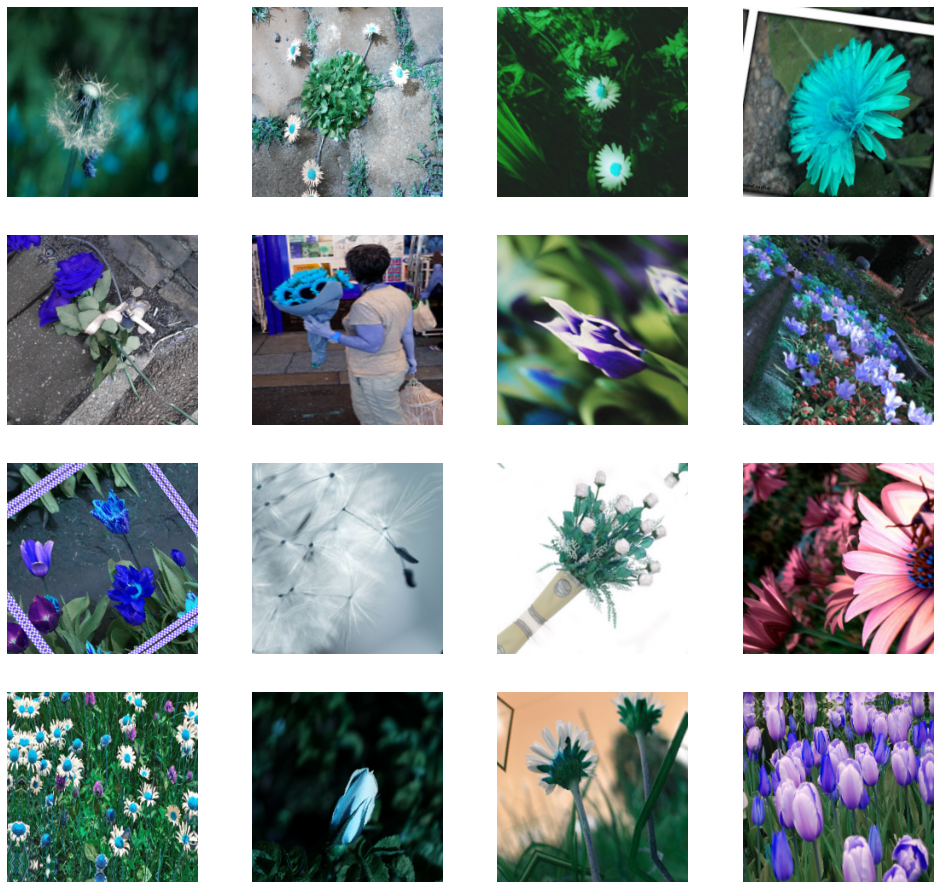

In [31]:
plt.figure(figsize=(15,15))    
for X, Y in datagen.flow(x_train, y_train, batch_size=32):
    for i in range(10, 10+16):
        plt.subplot(4,4,i+1-10)
        plt.imshow(X[i].reshape(224, 224, 3))
        plt.axis('off')    
    break
plt.show()